# <center>This is a presentation of some Investigation done on the Ford GoBike System Data </center>

## Investigation Overview

> the goal of this inverstigation is to show th overall usage of the system in terms of trip count and averege trip time,  
> show some relationship between the stations and the user type of the system, we went even further to show the time of service for most used bike on trip, 
> we desplay the stations geographically with there names.

## Dataset Overview

> > This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os
import zipfile
import glob
%matplotlib inline

In [2]:
def collector(folder_path=""):
    all_files = glob.glob(folder_path + "\\*.csv")
    li = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df)
    frame = pd.concat(li, axis=0, ignore_index=True)
    return frame   

In [3]:
bike_df=collector(folder_path=".\\fordgobike")

In [4]:
bike_df.dropna(subset=['member_birth_year'],inplace=True)


In [6]:
bike_df["age"] = bike_df["member_birth_year"].apply(lambda x: 2018 - int(x))

In [7]:
# data cleaning
bike_df.start_time=pd.to_datetime(bike_df.start_time)
bike_df.end_time=pd.to_datetime(bike_df.end_time)

In [8]:
bike_df.duration_sec=bike_df.duration_sec.astype(float)

<a id='analysis1'></a>
# <center>univariate exploration</center>

if we want to know how did the number of trip evolve per mounth for the year 2018

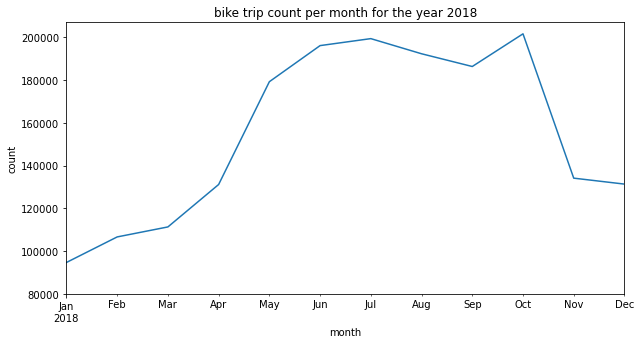

In [5]:
plt.figure(figsize=[10,5])
bike_df.set_index('start_time').resample('M').count()['user_type'].plot()
plt.title("bike trip count per month for the year 2018")
plt.ylabel('count')
plt.xlabel('month')
yticks =[x for x in range(80000,200000+1,20000)]
plt.yticks(yticks,yticks);

**comments on the plot :**
    - we see an sharp  increasing  in the number of trip from janury to may 
    - from may to october the number of trips still at a high number
    - we can argue about that, people are more likely yo use bike in the summer of on a vecation specialy in an urban area where people are more likely to use subways

if we want the bike trips count per user type for the year 2018

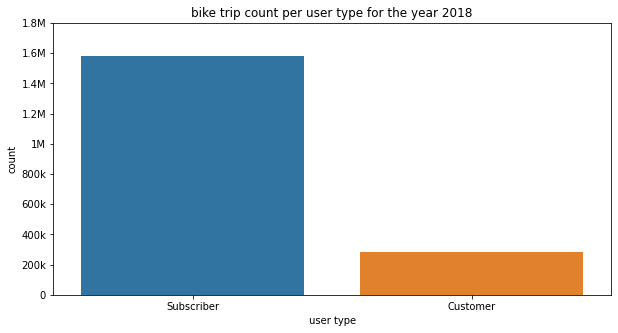

In [6]:
plt.figure(figsize=[10,5])
sb.countplot(data=bike_df, x='user_type')
plt.xlabel('number of tribike_share_for_all_tripp')
plt.xlabel('user type')
yticks =[x for x in range(0,1800000+1,200000)]
plt.title("bike trip count per user type for the year 2018")
yticks_lab =["0","200k","400k","600k","800k","1M","1.2M","1.4M","1.6M","1.8M"]
plt.yticks(yticks,yticks_lab);

**comments on the plot :**
    - as we can see from the barchart people who use bike regularly `Subscriber` are the people who make the vast majority of trips around 1.6 milion.
    - compared the the customer who make much more less trips
    

how many trip are made by members who are enrolled in the Bike Share for All program for low-income residents?

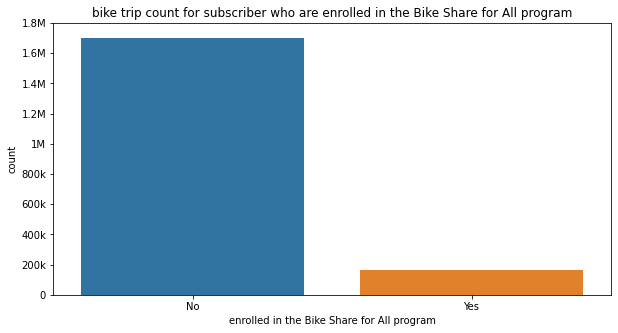

In [7]:
plt.figure(figsize=[10,5])
sb.countplot(data=bike_df, x='bike_share_for_all_trip')
plt.xlabel('number of trip')
plt.xlabel('enrolled in the Bike Share for All program')
yticks =[x for x in range(0,1800000+1,200000)]
plt.title("bike trip count for subscriber who are enrolled in the Bike Share for All program")
yticks_lab =["0","200k","400k","600k","800k","1M","1.2M","1.4M","1.6M","1.8M"]
plt.yticks(yticks,yticks_lab);

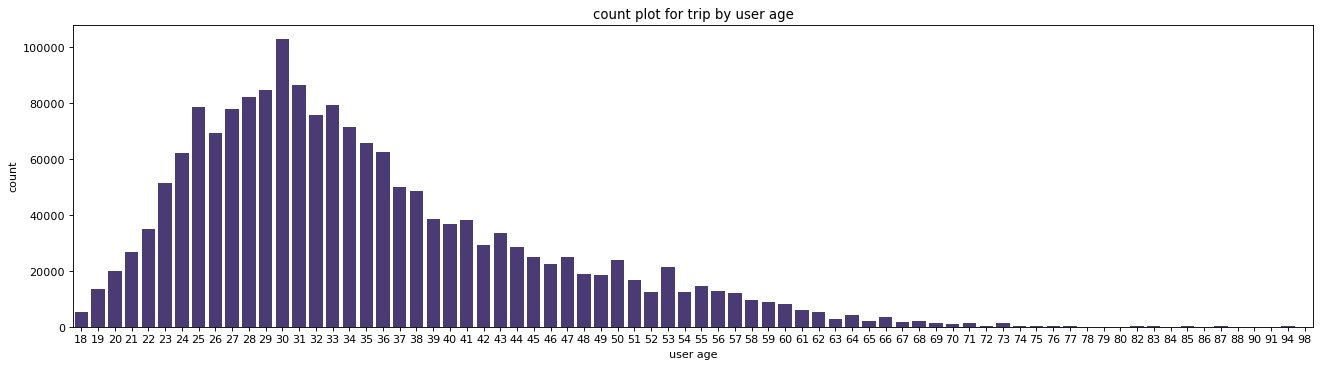

In [9]:
fig, ax = plt.subplots(figsize = (20,5), dpi = 80)
color = sb.color_palette("viridis")[0]
sb.countplot(x = "age", data = bike_df.query("age != 2018 and age < 100").sort_values("age"),color=color);
plt.xlabel('user age')
plt.title('count plot for trip by user age');

**comments on the plot :**
    - as we can see from the count plot the disribution of user age is largly between 22-40 years old
    

<a id='analysis2'></a>
# <center>bivariate exploration</center>

In [9]:
# get the top 10 city by value counts 'apparently pandas does the sorting for you' 
sub_station_df = bike_df.loc[bike_df['start_station_name'].isin(bike_df.start_station_name.value_counts()[:10].index)]

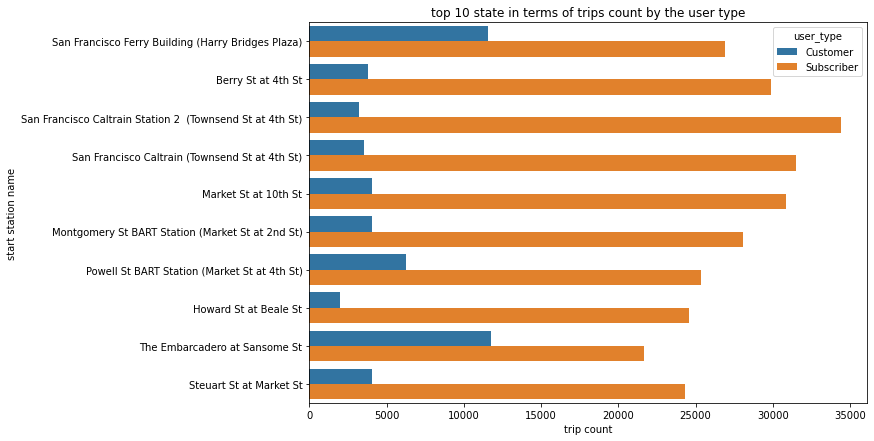

In [10]:
plt.figure(figsize=[10,7])
sb.countplot(data = sub_station_df, hue= 'user_type', y = 'start_station_name' )
plt.ylabel('start station name')
plt.xlabel('trip count')
plt.title("top 10 state in terms of trips count by the user type");
#plt.xticks(rotation = 90)

**comments on the plot :**
    - as we can see from the clustered barchart San Francisco Caltrain Station 2 (Townsend St at 4th St) has the highest number of trips done by subscriber type user.
    - otherwise The Embarcadero at Sansome St station has the highest number of Customer type user compared the overall number of trips in this station
    

In [11]:
#IQR = Q₃ − Q₁    for the duration_sec attribute
IQR =938.0 -382.0

In [12]:
#this just some old technique to detect outliers
outliers_free_df = bike_df.loc[(bike_df['duration_sec'] <= 1.5*IQR )]

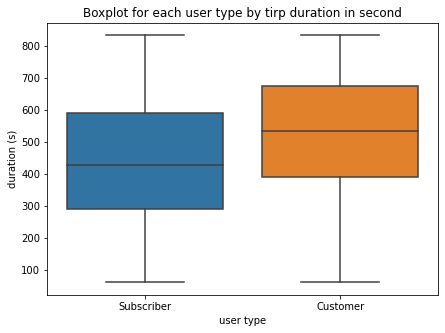

In [21]:
plt.figure(figsize=[7,5])
sb.boxplot(data = outliers_free_df, x = 'user_type', y = 'duration_sec')
plt.xlabel('user type')
plt.ylabel('duration (s)')
plt.title('Boxplot for each user type by tirp duration in second');

**comments on the plot :**
    - as we can see from the box that the median of duration for Customer type is a little ahead from the median of the Subscriber type
    

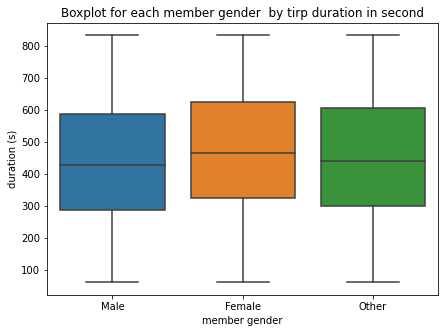

In [13]:
plt.figure(figsize=[7,5])
sb.boxplot(data = outliers_free_df, x = 'member_gender', y = 'duration_sec')
plt.xlabel('member gender')
plt.ylabel('duration (s)')
plt.title('Boxplot for each member gender  by tirp duration in second');

**comments on the plot :**
    - as we can see from the box that the median of duration for the Female gender  is a little ahead from the median of the other genders

In [15]:

bike_avg_gp = bike_df.groupby(bike_df['start_time'].dt.to_period("M")).mean()

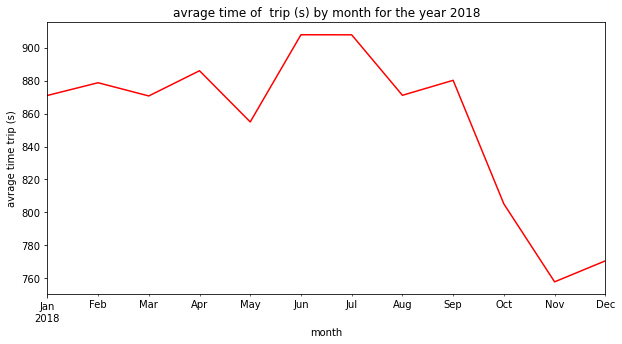

In [20]:
plt.figure(figsize=[10,5])
bike_avg_gp['duration_sec'].plot(color="red")
plt.xlabel('month')
plt.ylabel('avrage time trip (s)')
plt.title('avrage time of  trip (s) by month for the year 2018');

**comments on the plot :**
    - as we can see from the linechart people take longer trip in the summer 

In [17]:
#bike_df.bike_id.value_counts()
bike_need_replace_df = bike_df.loc[bike_df['bike_id'].isin(bike_df.bike_id.value_counts()[:10].index)]

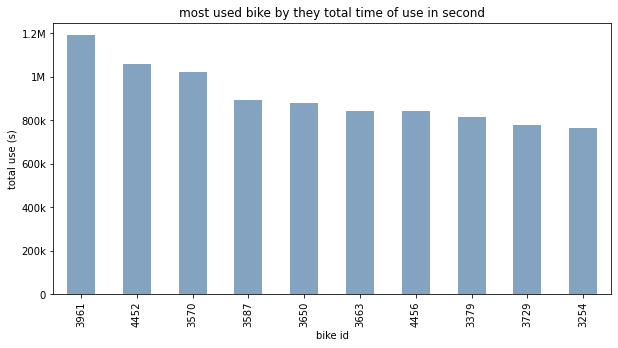

In [18]:
plt.figure(figsize=[10,5])
cat_means = bike_need_replace_df.groupby(['bike_id']).sum()['duration_sec'].sort_values(ascending=False).plot.bar(color=(0.2, 0.4, 0.6, 0.6))
plt.ylabel('total use (s)')
plt.xlabel('bike id')
plt.title('most used bike by they total time of use in second')
yticks=[_ for _ in range(0,1200000+1,200000)]
yticks_label=["0","200k","400k","600k","800k","1M","1.2M"]
plt.yticks(yticks,yticks_label);

#plt.bar(cat_means.index,cat_means.values)
#cat_means

**comments on the plot :**
    - as we can see from the  barchart is that some  bike maybe need to get some maintenance.

<a id='analysis3'></a>
# <center>multivariate exploration</center>

we will visualize every station on the map by it position and name using the ipyleaflet lib

In [22]:
#get evry station ID in the dataframe
startStationIds=set(bike_df.start_station_id.unique())
endStationIds=set(bike_df.end_station_id.unique())
totalStationId = startStationIds.union(endStationIds)

In [23]:
# remove np.nan form the set
totalStationId={x for x in totalStationId if x==x}

In [24]:
# get evrey station as a tuple (latitude,longitude,stationName) for the map
stationPosition=[]
for id in totalStationId:
    station_row = bike_df.query("start_station_id=={}".format(id))[['start_station_name','start_station_latitude','start_station_longitude']][:1]
    latitude= station_row['start_station_latitude'].tolist()[0]
    longitude=station_row['start_station_longitude'].tolist()[0]
    stationName=station_row['start_station_name'].tolist()[0]
    stationPosition.append((latitude,longitude,stationName))

In [25]:
from ipyleaflet import Map, Marker, MarkerCluster, ScaleControl,FullScreenControl
cenLt,cenLg,cenName = stationPosition[0]
m = Map(center=(cenLt,cenLg), zoom=15)
stationPositionFinal=[Marker(location=(x[0],x[1]),title=x[2],rise_on_hover=True) for x in stationPosition]
stationPositionFinal=tuple(stationPositionFinal)
marker_cluster = MarkerCluster(
    markers=stationPositionFinal
)
m.add_layer(marker_cluster);
m.add_control(ScaleControl(position='bottomleft'))
m.add_control(FullScreenControl())
m

C:\Users\HP\Anaconda3\lib\site-packages\dask\config.py:131: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


Map(center=[37.786375268600004, -122.40490436549999], controls=(ZoomControl(options=['position', 'zoom_in_text…

![title](mapfinal.png)

for more details and interaction with  the map please check the notebook **Presentation.ipynb**

In [16]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()


    # create plot
    
    plt.errorbar(x = bin_centers, y = means, **kwargs)
    plt.xlim(5,80)
    plt.ylim(0,2000)

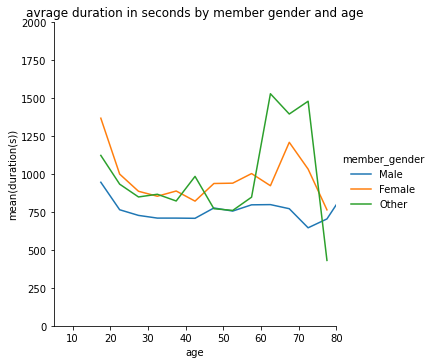

In [26]:
#plt.figure(figsize=[10,7])
bin_edges = np.arange(5, bike_df['age'].max()+5, 5)
g = sb.FacetGrid(data = bike_df, hue = 'member_gender', height = 5)
g.map(mean_poly, "age", "duration_sec", bins = bin_edges)
g.set_ylabels('mean(duration(s))')
plt.title('avrage duration in seconds by member gender and age')
g.add_legend();

**comments on the plot :**
    - as we can see Female on avarege take a longer trip because we have more Male user on our data

In [19]:
bike_df.member_gender.values_counts()

Male      1288085
Female     437837
Other       27081
Name: member_gender, dtype: int64

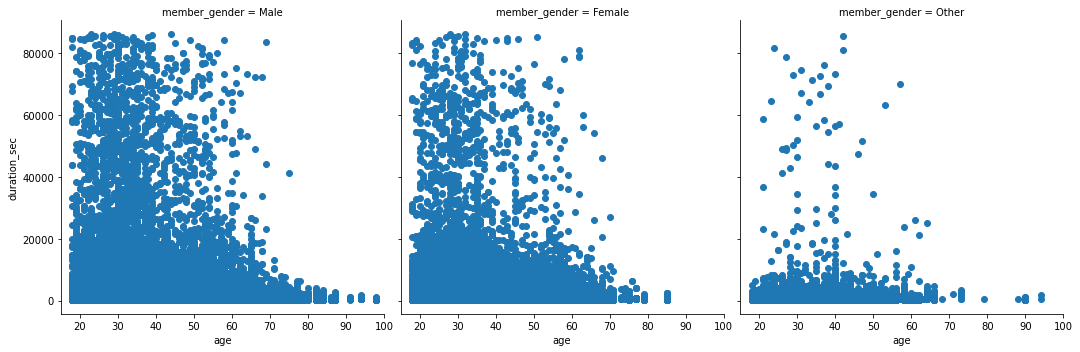

In [24]:
g = sb.FacetGrid(data = bike_df, col = 'member_gender', height = 5,
                margin_titles = True)
g.map(plt.scatter, 'age', 'duration_sec')
plt.xlim(15,100);

**comments on the plot :**
    - we have more Male users
    - as we can from the scatter plot however the gender bike renter duration follow tha same pattern
    - the vast majority of trips are between 0 and 20000 (s) duration